# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


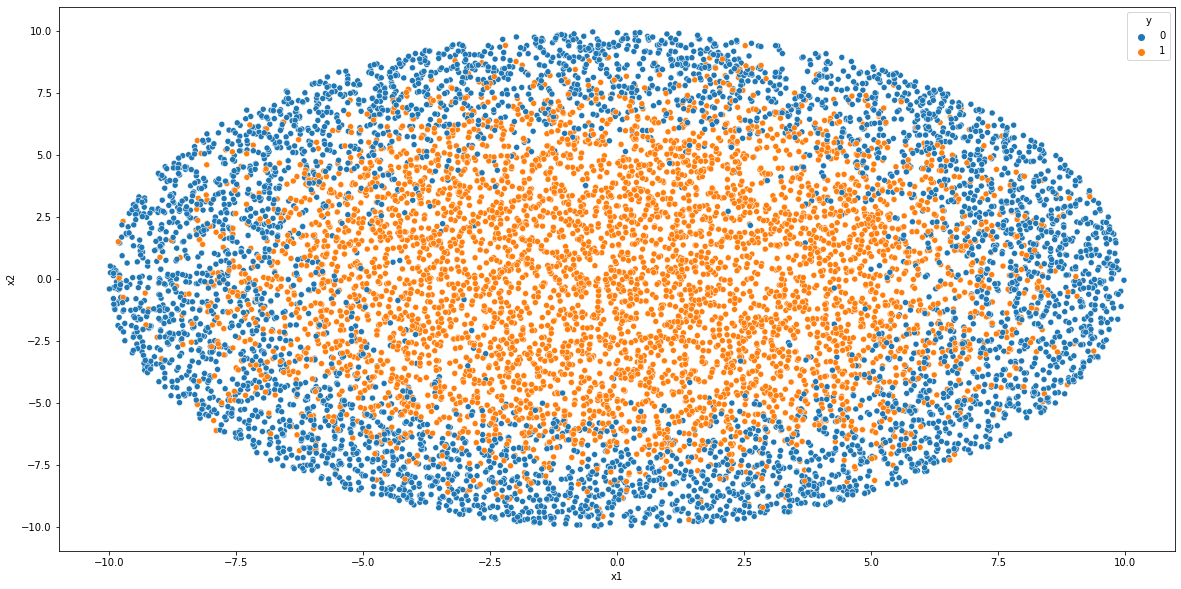

In [27]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5924242424242424


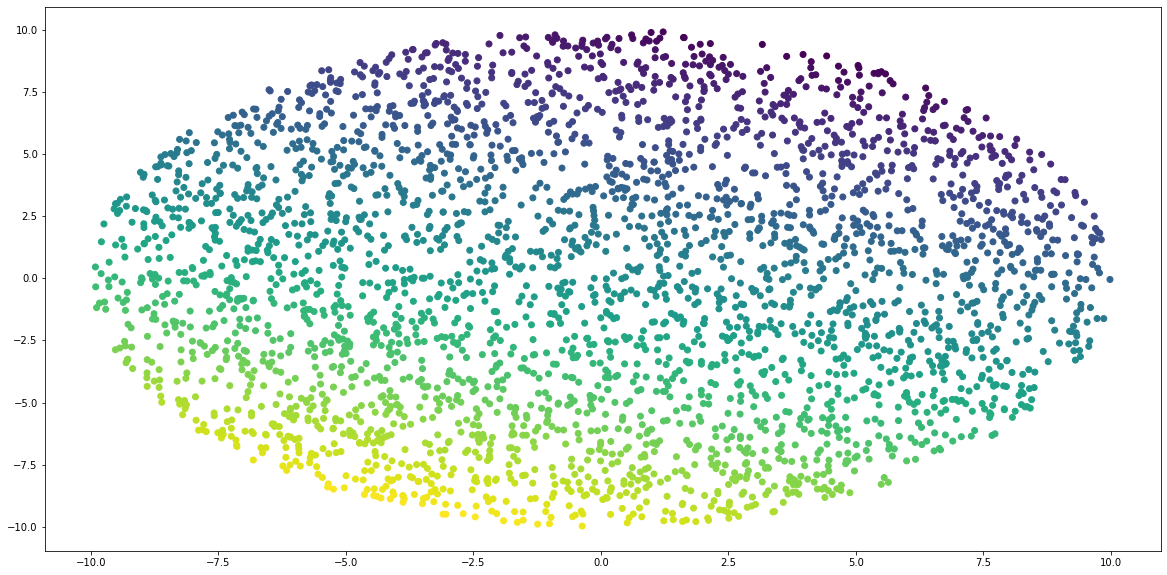

In [29]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predict_logit = logreg.predict(X_test)
predict_log_proba = logreg.predict_proba(X_test)[:,0]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8381818181818181


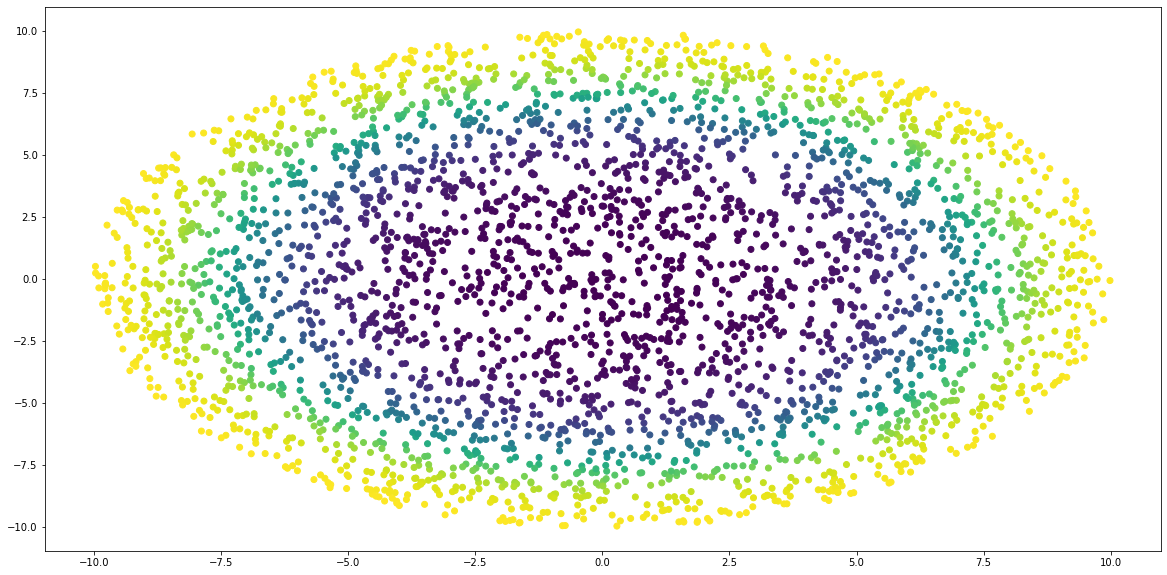

In [70]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['x1_sq'] = df_new['x1']**2
df_new['x2_sq'] = df_new['x2']**2
df_new['x1_x2'] = df_new['x1']*df_new['x2']


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1',
                                                                            'x2',
                                                                            'x1_sq',
                                                                            'x2_sq',
                                                                            'x1_x2']],
                                                                    df_new['y'], test_size = 0.33)

logreg.fit(X_train_new, y_train_new)
predict_logit = logreg.predict(X_test_new)
predict_log_proba = logreg.predict_proba(X_test_new)[:,0]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.7739393939393939


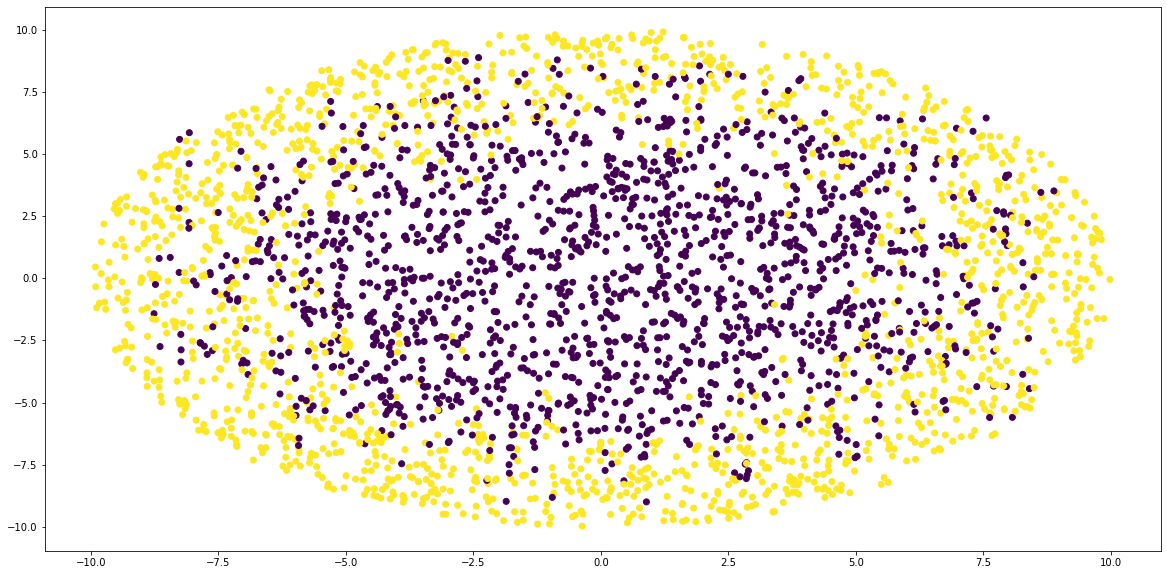

In [73]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)
predict_tree = DT.predict(X_test)

print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = DT.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8178787878787879


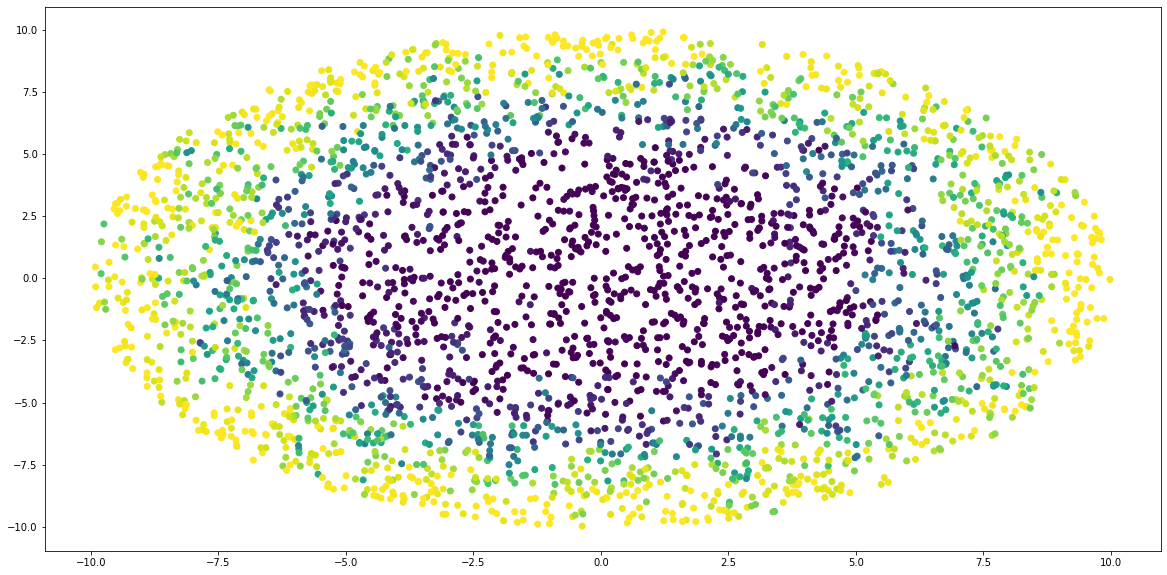

In [74]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

RF = RandomForestClassifier()

RF.fit(X_train, y_train)
predict_forest = RF.predict(X_test)

print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = RF.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [225]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 128

In [158]:
!pip install torchmetrics -q

In [226]:
import torch
import torch.nn as nn # содержит функции для реалзации архитектуры нейронных сетей
import torch.nn.functional as F # содержит различные функции активации и не только
import torch.optim as optim
import torch.utils.data as data_utils

from torchmetrics import Accuracy

In [227]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [228]:
train_loader, test_loader = create_data_loader(X_train.values, y_train.values, X_test.values, y_test.values)


In [229]:
def build_simple_model():
    # Sequential - наборс последовательных слоёв
    model = nn.Sequential(  
        # Добавляем в нашу модель первый слой из 5 нейронов
        nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
        nn.Sigmoid(),
        # Добавляем ещё один слой из 5 нейронов
        nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
        
        # Выходной вектор на количество классов, получаем с помощью такого же линейного приеобразования,
        # как и предыдущие слои, но уже на нужное количество выходных нейронов (т.е. классов)
        nn.Softmax(),
    )

    return model

In [230]:
model = build_simple_model()

In [231]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): Softmax(dim=None)
)


In [235]:
# Оптимизатор
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Функция потерь
criterion = nn.CrossEntropyLoss()

# Метрика
accuracy = Accuracy()

# softmax = nn.Softmax()

In [236]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0

    # Epochs
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        model.train()
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()
            
            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : train_loss: %f train_acc: %f' % (epoch, train_loss_values[-1], train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        model.eval()
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            
            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print('EPOCH %d : valid_loss: %f valid_acc: %f' % (epoch, valid_loss_values[-1], valid_accuracy[-1]))
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [237]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy_values = run_train()

EPOCH 0 : train_loss: 0.699737 train_acc: 0.519391
EPOCH 0 : valid_loss: 0.699932 valid_acc: 0.536262
EPOCH 20 : train_loss: 0.651117 train_acc: 0.688693
EPOCH 20 : valid_loss: 0.653052 valid_acc: 0.671707
EPOCH 40 : train_loss: 0.587802 train_acc: 0.825579
EPOCH 40 : valid_loss: 0.589638 valid_acc: 0.819267
EPOCH 60 : train_loss: 0.545580 train_acc: 0.827723
EPOCH 60 : valid_loss: 0.548057 valid_acc: 0.820252
EPOCH 80 : train_loss: 0.523656 train_acc: 0.825793
EPOCH 80 : valid_loss: 0.525176 valid_acc: 0.828281


In [238]:
torch.save(model, 'simple_nn.pth')

In [239]:
model = torch.load('simple_nn.pth')
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): Softmax(dim=None)
)

Точность нашей модели 0.8324242424242424


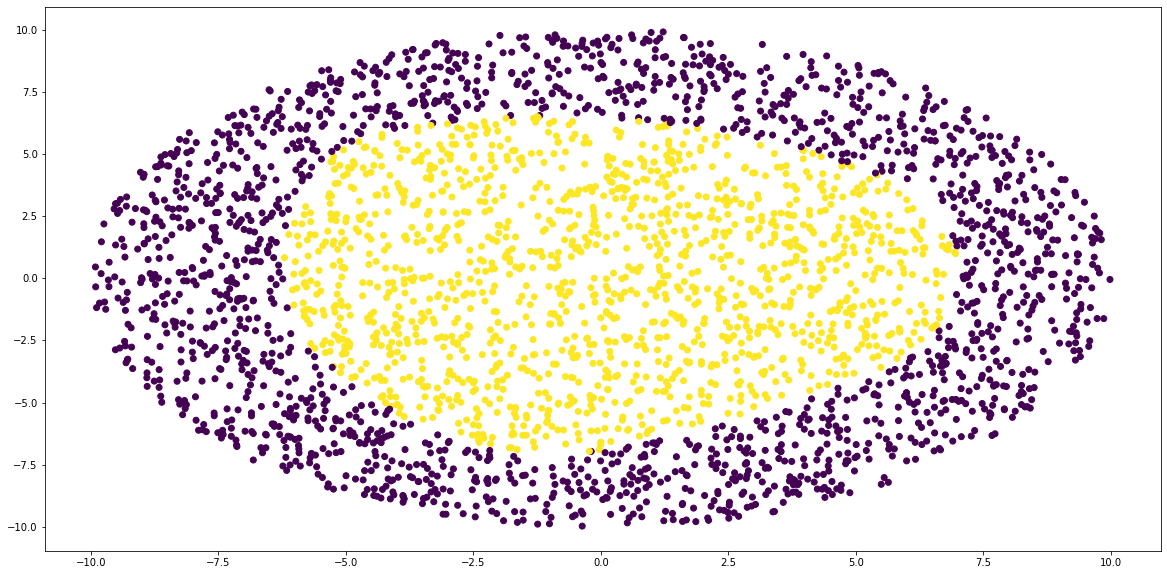

In [252]:
#########################################
# Ваш код
with torch.no_grad():
    predict_neural = model(torch.tensor(X_test.values.astype(np.float32)))
predict_classes = torch.argmax(predict_neural, dim=1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_classes.unsqueeze(dim=1))
plt.show()